## Financial News & Stock Price Integration Dataset - Exploratory Data Analysis

Objective: Perform Exploratory Data Analysis (EDA) on financial news data to uncover trends in publication frequency, identify key publishers and their content focus, and extract significant market topics.

Analysis Scope:

Descriptive Statistics: Headline lengths, publisher activity, and basic counts.

Time Series Analysis: Publication trends over time (monthly, daily) and specific publishing times (hourly).

Publisher Analysis: Identifying top contributors, unique email domains, and analyzing the type of news they report.

Text Analysis: Extracting common keywords and performing Topic Modeling (LDA) to identify market themes.

### 1. Setup and Imports
First, we import the necessary libraries and our custom modules from the scripts folder.

In [1]:
import os
import sys
import warnings

# Add scripts directory to path to allow imports
sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.data_loader import DataLoader

from scripts.financial_analysis import FinancialDataAnalyzer, FinancialDataVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_FILEPATH = '../data/raw_analyst_ratings.csv'  # Update this path as needed

print("Libraries and Custom Modules Loaded Successfully.")

Libraries and Custom Modules Loaded Successfully.


### 2. Data Loading
We utilize the DataLoader class to load the raw CSV data.

In [2]:
# Initialize Loader and Load Data
loader = DataLoader()

try:
    raw_df = loader.load_data(DATA_FILEPATH)
    print(f'\nData Loaded Successfully. Shape: {raw_df.shape}')
    print(raw_df.head())
except FileNotFoundError:
    print("Error: Data file not found. Please check DATA_FILEPATH.")


Data Loaded Successfully. Shape: (1407328, 6)
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45

### 3. Initial Exploration & Cleaning
Before visualizing, we must clean the data. The DataAnalyzer class handles:

Date Parsing: Converting strings to datetime objects to enable Time Series analysis.

Feature Engineering: Creating headline_length, hour, and day_of_week columns.

Text Cleaning: Removing extra spaces and standardizing text.

#### Step 1: View Raw Statistics (Missing values, duplicates, etc.)

In [3]:
# Initialize the Analyzer with raw data
analyzer = FinancialDataAnalyzer(raw_df)

analyzer.explore_data()

[INIT] Loaded dataset with 1407328 rows and 6 columns.


================ EXPLORING RAW DATA ================

[1] Dataset Overview
Rows: 1407328 | Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

[2] Missing Values
Series([], dtype: int64) 

[3] Duplicate Rows
Total duplicates: 0

[4] Numeric Summary
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06 

[5] Categorical Columns Overview
Column: headline
- Unique: 845770
headline
Benzinga's Top Upgrades       5449
Benzinga's Top Downgrades     5372
Benzinga's Top Initiations    4241
Name: count, dtype: int64 

Column: url
- Unique: 883429
url
https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday    1704
https://www.benzinga.com/news/20/03/15607641/stocks-that-hit-52-week-lows-on-thursday     754
https://www.benzinga.com/news/20/02/15441854/stocks-that-hit

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


#### Step 2: Clean Data and Create Features
#### This returns the cleaned dataframe to be used by the Visualizer

In [4]:
clean_df = analyzer.clean_data()


================ CLEANING DATA ================

Dropped 0 rows with missing headline/stock/publisher.

Removed 11355 duplicate rows.

Removed 0 rows with invalid dates.

Removed 0 rows containing empty strings.

=== Completed Data Cleaning ===



#### Step 3: Initialize Visualizer with the cleaned dataframe

In [5]:
visualizer = FinancialDataVisualizer(clean_df)

### 4. Descriptive Statistics & Time Series Analysis
In this section, we analyze:

Headline Lengths: Are headlines short and punchy or detailed?

Time Series: We look at the volume of news over time to identify spikes (Monthly trends).

Publishing Times: We analyze the hour column to see if news correlates with Market Open/Close times.

Weekdays: Frequency of news by day of the week.

In [6]:
# Get numerical summaries in the console
analyzer.exploratory_analysis()


================ EXPLORATORY ANALYSIS ================

Shape: (1395973, 10)

Date Range: 2009-02-14 00:00:00-04:00 -> 2020-06-11 17:12:35-04:00

Top 10 Stocks:
 stock
MRK     3300
MS      3149
MU      3138
NVDA    3137
NFLX    3028
EBAY    3012
M       2998
VZ      2962
GILD    2951
QCOM    2933
Name: count, dtype: int64 

Articles by Hour:
 hour
0     1340058
1          14
2          57
3          93
4        1469
5        1829
6        2475
7        5032
8        5526
9        5965
10       7668
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2799
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64 

Headline Length Stats:
 count    1.395973e+06
mean     7.326273e+01
std      4.081928e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64 

Publisher Count: 1031 

Top 5 Publishers:
 pu

,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0
...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17


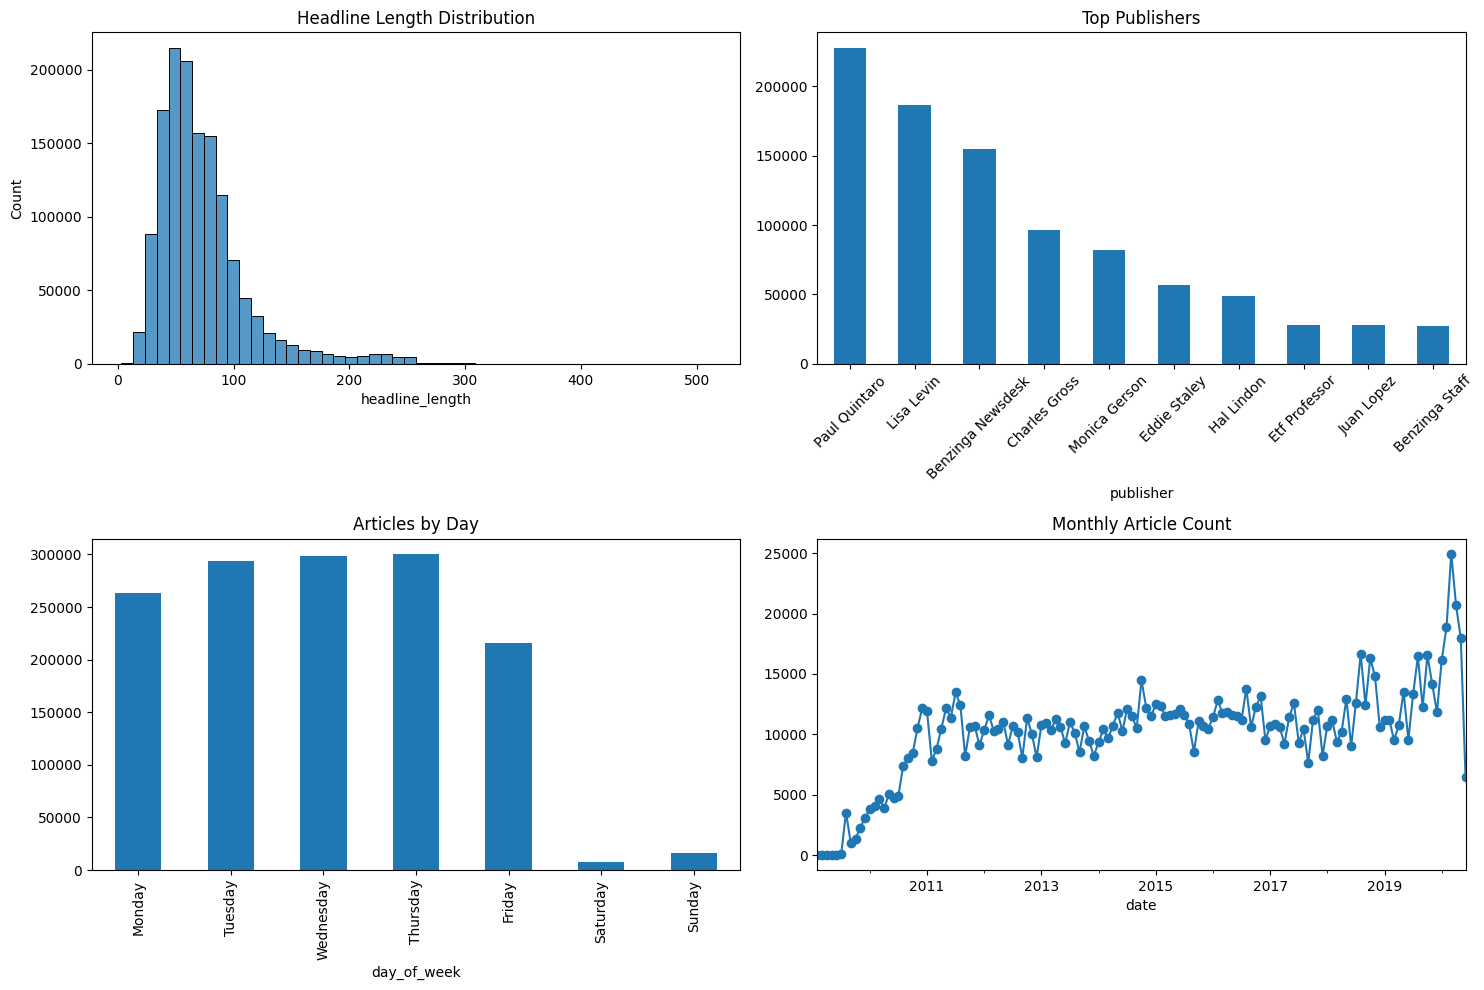

In [7]:
# Generate visualizations:
# 1. Headline Length Distribution
# 2. Top 10 Publishers Bar Chart
# 3. Articles by Day of Week
# 4. Monthly Publication Timeline
visualizer.descriptive_statistics()

### 5. Publisher Analysis
We investigate the sources of the news:

Top Publishers: Who contributes the most volume?

Content Focus: Do specific publishers focus on Earnings, Ratings, or General News?

Domains: Identifying unique organizations from email addresses found in the publisher column.

#### 1. Print Counts & Extract Domains 

In [8]:

analyzer.analyze_publishers()


================ PUBLISHER ANALYSIS ================

Top Publishers:
 publisher
Paul Quintaro        227495
Lisa Levin           186716
Benzinga Newsdesk    154645
Charles Gross         96558
Monica Gerson         82056
Eddie Staley          56896
Hal Lindon            48958
Etf Professor         28251
Juan Lopez            28110
Benzinga Staff        27526
Name: count, dtype: int64 

Publisher Breakdown:
 article_type       Earnings  Market   Other  Pharma  Ratings
publisher                                                   
Benzinga Newsdesk     45923   36143   65298    2240     5041
Charles Gross         16572    3355   73742    1546     1343
Lisa Levin            22882   97406   44313     281    21834
Monica Gerson         22815   30264   18323     332    10322
Paul Quintaro         82470    5875  107797    2483    28870 

=== Completed Publisher Analysis ===



,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour,article_type
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0,Other
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0,Other
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0,Other
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0,Other
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0,Other
...,...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16,Market
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16,Other
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17,Other
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17,Earnings


#### 2. Visualize the Content Focus
#Plots a stacked bar chart showing what type of news the top publishers write

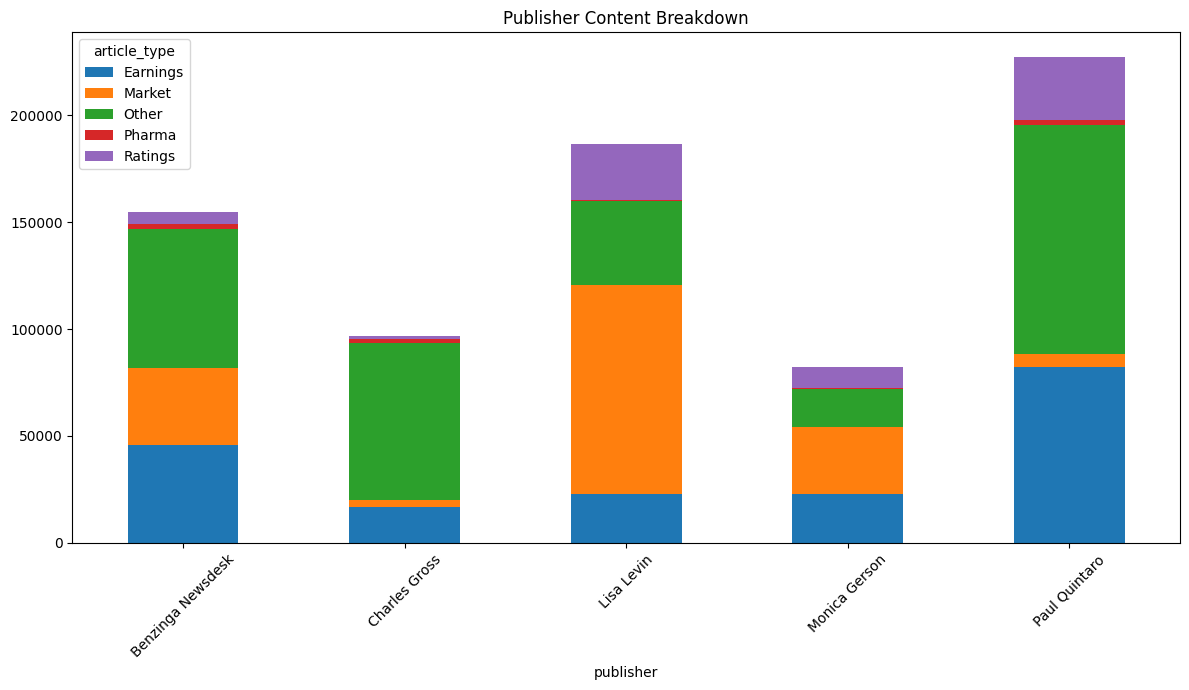

In [9]:

visualizer.plot_publisher_types()

### 6. Text Analysis: Key Phrases
We search for specific financial keywords (e.g., "FDA Approval", "Price Target", "Earnings") to quantify significant market events.

In [10]:
# Search headlines for predefined list of financial events
phrase_counts = analyzer.analyze_key_phrases()


================ KEY PHRASE ANALYSIS ================

price target: 47616
upgrade: 61738
downgrade: 66678
earnings: 86192
fda approval: 1545
merger: 5591
acquisition: 8847
ipo: 8169
stock split: 747
dividend: 21434
guidance: 15595
analyst rating: 57
=== Completed Key Phrase Analysis ===



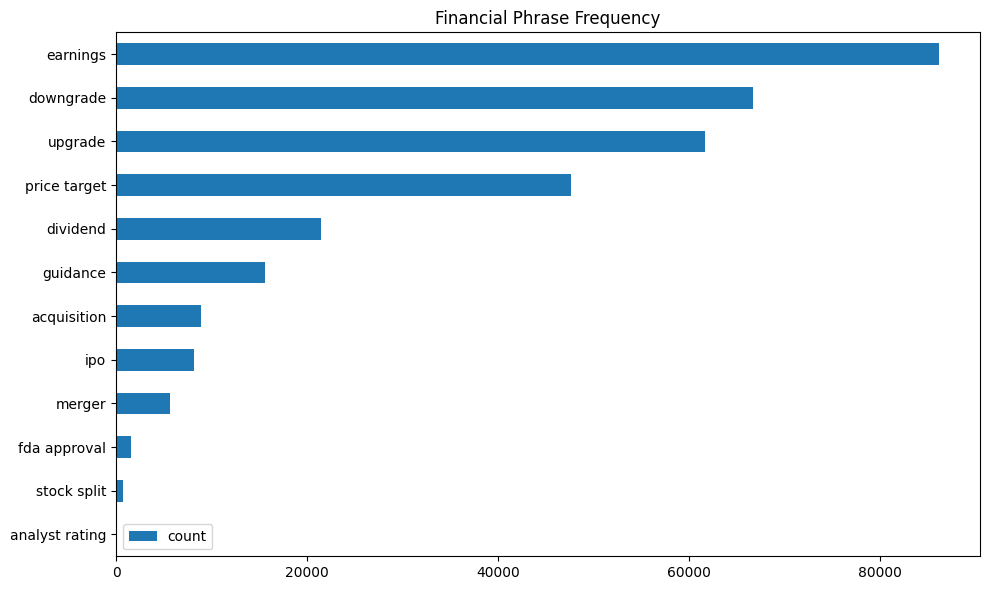

In [11]:
# Visualize the frequency of these specific events
visualizer.visualize_key_phrases(phrase_counts)

### 7. Text Analysis: Topic Modeling (LDA)
We use Latent Dirichlet Allocation (LDA) to discover hidden thematic structures in the headlines.

Preprocessing: We remove common stopwords and financial-specific stopwords (like "stocks", "market", "trading") to ensure the topics are meaningful.

Visualization: We display the top keywords associated with each topic.

In [12]:
# Extract Topics using LDA (defaults to 5 topics)
# This returns a dictionary of {Topic Name: [List of Keywords]}
lda_topics = analyzer.extract_topics(num_topics=5)


================ TOPIC MODELING ================

=== Completed Topic Modeling ===



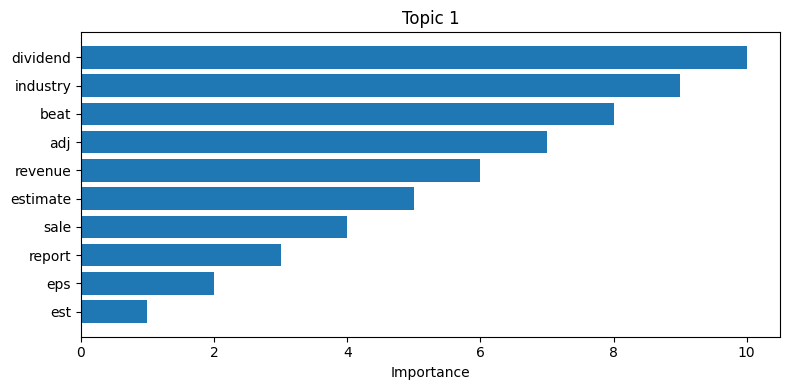

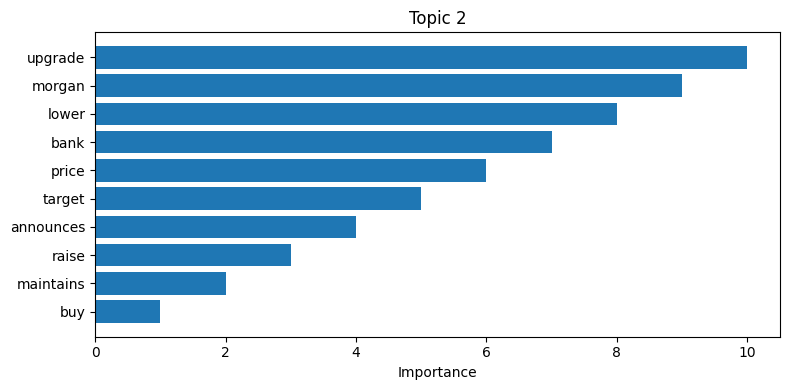

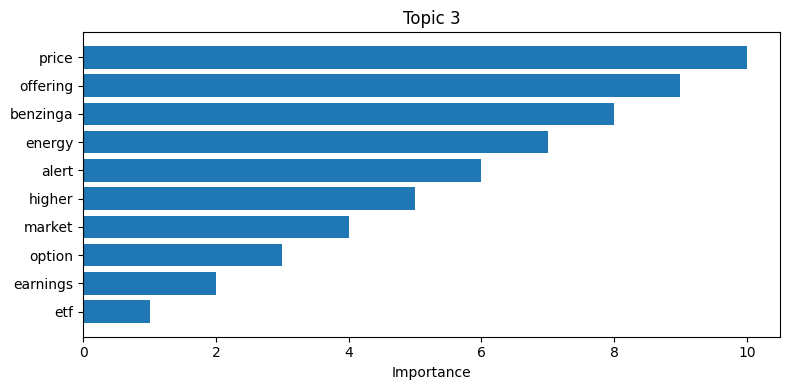

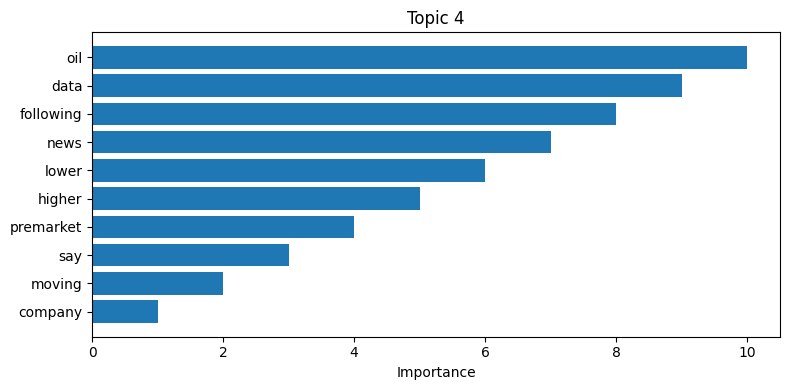

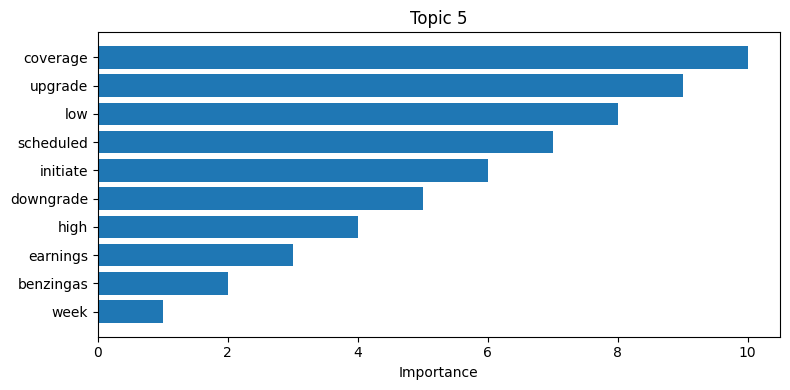

In [13]:
# Visualize the resulting topics as word charts
visualizer.visualize_topics(lda_topics)

In [14]:
# Optional: Save the cleaned and processed data for future use
analyzer.save_to_csv('../data/processed_financial_news.csv')

Saved cleaned dataset to ../data/processed_financial_news.csv


,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour,article_type
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0,Other
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0,Other
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0,Other
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0,Other
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0,Other
...,...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16,Market
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16,Other
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17,Other
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17,Earnings
